In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
from prospect.utils.obsutils import fix_obs

from agnfinder.prospector import visualise, main, cpz_builders

In [3]:
os.chdir('/home/mike/repos/agnfinder')

In [4]:
galaxy_index = 1
galaxy = main.load_galaxy(galaxy_index)
redshift = galaxy['redshift']

In [5]:
agn_mass = True
agn_eb_v = True
agn_torus_mass = True
igm_absorbtion = True

In [6]:
run_params, obs, model, sps = main.construct_problem(galaxy, redshift=redshift, agn_mass=agn_mass, agn_eb_v=agn_eb_v, agn_torus_mass=agn_torus_mass, igm_absorbtion=igm_absorbtion)

In [7]:
samples_loc = 'results/mixed_wide_loguniform_priors_fixed_inclination/agn_loguniform_mass_0_1564679232_multinest_samples.h5py'

In [8]:
with h5py.File(samples_loc, 'r') as f:
    samples = f['samples'][...]

In [42]:
theta_array = samples[-2000:, :]

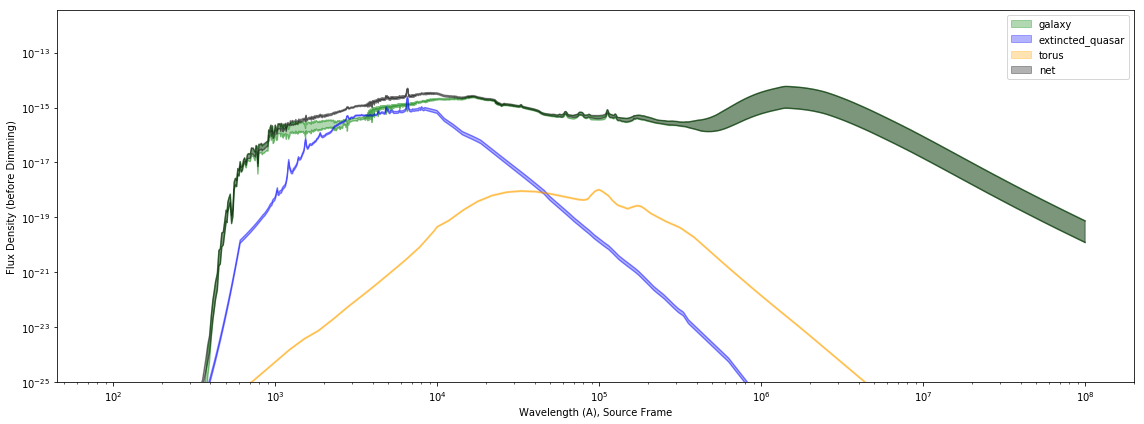

In [43]:
visualise.calculate_many_components(model, theta_array, obs, sps)
plt.legend()
# plt.ylim([1e-20, 1e-13])
# plt.ylim([1e-15, 1e-14])
plt.ylim([1e-25, None])
plt.tight_layout()